# Menentukan Koefisien Gesekan μ dari Gaya Gesek dan Gaya Normal

## Pendahuluan

Dalam kehidupan sehari-hari dan dalam berbagai sistem teknik, gaya gesek memainkan peran penting dalam mengontrol gerakan antara dua permukaan yang bersentuhan. Salah satu parameter utama yang menggambarkan interaksi ini adalah **koefisien gesekan (μ)**, yang menunjukkan seberapa besar gaya gesek yang muncul dibandingkan dengan gaya normal yang bekerja pada benda.

Secara umum, gaya gesek dapat dinyatakan melalui hubungan:
$$
\
F_{\text{f}} = \mu \, F_N
\
$$
dengan $( F_{\text{f}} )$ adalah gaya gesek, $( \mu )$ adalah koefisien gesekan, dan $( F_N )$ adalah gaya normal.

Penentuan nilai $( \mu )$ secara eksperimental sangat penting untuk berbagai aplikasi teknik, seperti sistem pengereman, perancangan mesin, robotika, hingga perhitungan efisiensi energi. Namun, data eksperimen yang diperoleh tidak selalu linier sempurna, sehingga diperlukan pendekatan numerik untuk memperoleh nilai $( \mu )$ yang akurat dari data.

Melalui tugas besar ini, dilakukan analisis numerik untuk menentukan nilai koefisien gesekan $( \mu )$ menggunakan dua metode numerik berbeda, yaitu:
- **Regresi linear tanpa intersep** untuk menemukan hubungan terbaik antara gaya gesek dan gaya normal.
- **Interpolasi linier** untuk memperkirakan nilai-nilai lokal dari $( \mu )$ antara dua titik data eksperimen.

Selain itu, dilakukan **analisis galat** untuk membandingkan hasil dari kedua metode dan mengevaluasi keakuratannya. Studi ini diharapkan dapat memperkuat pemahaman tentang penerapan teknik komputasi dalam analisis fenomena fisis nyata.

## Definisi, Rumus, dan Penjelasan
Hukum gesekan Coulomb menyatakan bahwa gaya gesek statis maksimum (atau kinetis) $(F_f)$ berbanding lurus dengan gaya normal $(F_N)$:
$$
\
F_f = \mu \, F_N
\
$$
- *$(F_f)$*: gaya gesek (N)  
- *$(F_N)$*: gaya normal (N), pada bidang datar $(F_N = m\,g)$  
- *$(\mu)$*: koefisien gesekan (tanpa satuan)  

Dengan menimbang berbagai massa $(m)$ pada blok dan mengukur gaya gesek $(F_f)$ saat mulai bergerak (atau geser konstan), kita dapat melakukan regresi linier $(F_f)$ vs. $(F_N)$ untuk mendapatkan slope = $(\mu)$. Interpolasi linear membantu memprediksi gaya gesek di antara nilai gaya normal yang diuji.


## Data Acak
### Tabel Data Eksperimen Gaya Normal vs Gaya Gesek



| No | Gaya Normal (N) | Gaya Gesek (N) |
|----|------------------|-----------------|
| 1  | 11.24            | 3.65            |
| 2  | 43.65            | 14.86           |
| 3  | 32.16            | 10.61           |
| 4  | 27.74            | 9.51            |
| 5  | 21.23            | 6.82            |
| 6  | 16.30            | 5.63            |
| 7  | 47.56            | 15.66           |
| 8  | 39.19            | 13.00           |
| 9  | 34.13            | 11.57           |
| 10 | 14.53            | 5.12            |

> Data di atas disimulasikan dari model $( \mu = 0.35 )$ dengan sedikit noise untuk meniru kondisi eksperimen.

Berikut adalah tabel referensinya:

| No | Pasangan Permukaan        | Rentang $( \mu )$ Statis | Sumber Referensi                                                                 |
|----|----------------------------|---------------------------|----------------------------------------------------------------------------------|
| 1  | Kayu - Kayu                | 0.25 – 0.50               | Engineering Toolbox (engineeringtoolbox.com)                                     |
| 2  | Plastik - Logam           | 0.2 – 0.4                 | Halliday & Resnick, *Fundamentals of Physics*                                   |
| 3  | Logam - Logam (kering)    | 0.3 – 0.6                 | Tabel Koefisien Gesekan Umum – Buku Panduan Praktikum Fisika Dasar              |
| 4  | Karet - Kayu              | 0.4 – 0.7                 | Engineering Toolbox                                                              |
| 5  | Nilai Umum untuk Permukaan Kasar | ~0.3 – 0.4               | Digunakan dalam banyak eksperimen laboratorium dasar di universitas             |


Berikut ini adalah tabel setelah data diurutkan untuk interpolasi linear:

| No  | Gaya Normal (N) | Gaya Gesek (N) |
|-----|-----------------|----------------|
| 1   | 11.24           | 3.65           |
| 2   | 14.53           | 5.12           |
| 3   | 16.30           | 5.63           |
| 4   | 21.23           | 6.82           |
| 5   | 27.74           | 9.51           |
| 6   | 32.16           | 10.61          |
| 7   | 34.13           | 11.57          |
| 8   | 39.19           | 13.00          |
| 9   | 43.65           | 14.86          |
| 10  | 47.56           | 15.66          |


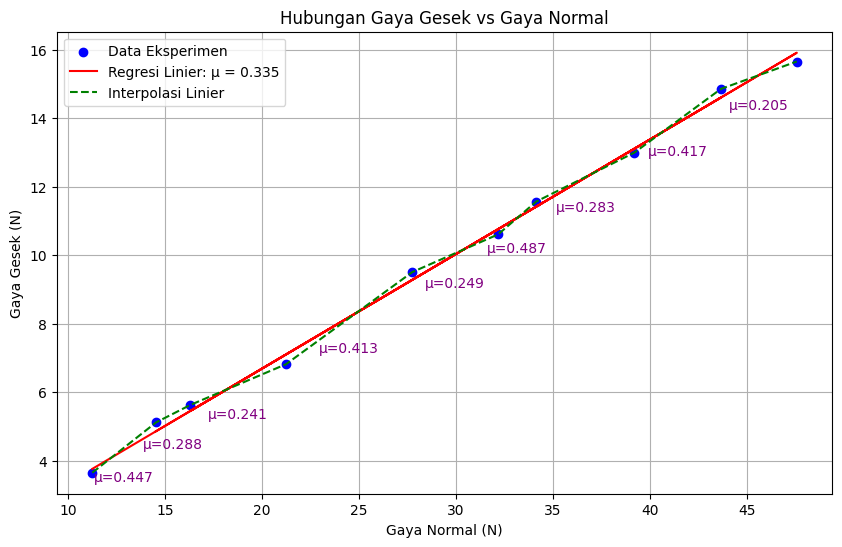

Koefisien gesekan (μ) dari regresi linier  : 0.335
Rata-rata koefisien (μ) dari interpolasi   : 0.337
Galat Absolut antara regresi & interpolasi : 0.0020
Galat Relatif (%) antara keduanya          : 0.60 %


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data acak gaya normal dan gaya gesek (dari tabel sebelumnya)
gaya_normal = np.array([11.24, 43.65, 32.16, 27.74, 21.23, 16.30, 47.56, 39.19, 34.13, 14.53])
gaya_gesek = np.array([3.65, 14.86, 10.61, 9.51, 6.82, 5.63, 15.66, 13.00, 11.57, 5.12])

# === Regresi linier tanpa intersep ===
X = gaya_normal.reshape(-1, 1)
y = gaya_gesek
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
mu_regresi = model.coef_[0]
y_pred_regresi = model.predict(X)

# === Interpolasi linier antar titik urut (disortir berdasarkan gaya normal) ===
sort_idx = np.argsort(gaya_normal)
x_sorted = gaya_normal[sort_idx]
y_sorted = gaya_gesek[sort_idx]
mu_interpolasi = np.diff(y_sorted) / np.diff(x_sorted)
mu_interp_rata2 = np.mean(mu_interpolasi)

# === Analisis Galat ===
galat_absolut = abs(mu_regresi - mu_interp_rata2)
galat_relatif = (galat_absolut / abs(mu_regresi)) * 100

# === Plot grafik ===
plt.figure(figsize=(10, 6))
plt.scatter(gaya_normal, gaya_gesek, label='Data Eksperimen', color='blue')
plt.plot(gaya_normal, y_pred_regresi, color='red', label=f'Regresi Linier: μ = {mu_regresi:.3f}')
plt.plot(x_sorted, y_sorted, '--', color='green', label='Interpolasi Linier')
plt.xlabel("Gaya Normal (N)")
plt.ylabel("Gaya Gesek (N)")
plt.title("Hubungan Gaya Gesek vs Gaya Normal")
plt.legend()
plt.grid(True)

# Tampilkan nilai koefisien gesekan lokal (μ) dari interpolasi
for i in range(len(mu_interpolasi)):
    plt.text((x_sorted[i] + x_sorted[i + 1]) / 2, 
             (y_sorted[i] + y_sorted[i + 1]) / 2 - 1.0,  
             f'μ={mu_interpolasi[i]:.3f}', 
             color='purple', fontsize=10, ha='center')

plt.show()

# === Cetak hasil ===
print(f"Koefisien gesekan (μ) dari regresi linier  : {mu_regresi:.3f}")
print(f"Rata-rata koefisien (μ) dari interpolasi   : {mu_interp_rata2:.3f}")
print(f"Galat Absolut antara regresi & interpolasi : {galat_absolut:.4f}")
print(f"Galat Relatif (%) antara keduanya          : {galat_relatif:.2f} %")


## Analisis Kerugian Energi Akibat Gesekan 

Berdasarkan nilai koefisien gesekan $( \mu )$ yang telah diperoleh sebelumnya yaitu 0.335, kita dapat menghitung energi yang hilang (dalam bentuk panas atau deformasi) akibat gesekan saat benda bergerak sejauh $( d )$ di atas permukaan.

Rumus yang digunakan:
$$
\
W_{\text{hilang}} = \mu \cdot m \cdot g \cdot d
\
$$
**Keterangan variabel:**

- $( W_{\text{hilang}} )$: Energi/Usaha yang hilang karena gesekan (Joule)
- $( \mu )$: Koefisien gesekan (tanpa satuan)
- $( m )$: Massa benda (kg)
- $( g )$: Percepatan gravitasi (9.8 m/s²)
- $( d )$: Jarak tempuh benda (m)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import warnings
warnings.filterwarnings("ignore") 

# Parameter tetap
mu = 0.335  # Koefisien gesekan
g = 9.8     # Percepatan gravitasi (m/s^2)

# Fungsi utama untuk plotting hubungan antara jarak dan energi gesekan
def plot_energi(m, max_d):
    d_vals = np.linspace(0, max_d, 100)  
    W_vals = mu * m * g * d_vals         

    plt.figure(figsize=(8, 5))         
    plt.plot(d_vals, W_vals, label="Energi yang hilang", color='orange')  

    # Menandai titik-titik jarak bulat (0, 1, 2, ...) dengan label energi
    for d in range(int(max_d) + 1):
        W = mu * m * g * d
        plt.plot(d, W, 'ro')            
        if d == 0:
            plt.text(d, W + 2.0, f"{W:.2f} J", ha='center', fontsize=9, color='blue') 
        else:
            plt.text(d, W - 3.0, f"{W:.2f} J", ha='center', fontsize=9, color='blue') 

    # Pengaturan tampilan grafik
    plt.xlabel("Jarak tempuh (m)")
    plt.ylabel("Energi hilang akibat gesekan (Joule)")
    plt.title(f"Hubungan Jarak dan Energi Gesekan\n(m = {m:.1f} kg, Jarak max = {max_d:.1f} m)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Output nilai energi gesekan secara numerik per meter
    print("\nEnergi hilang akibat gesekan di tiap meter:")
    for d in range(int(max_d) + 1):
        W = mu * m * g * d
        print(f"Jarak = {d} m → Energi hilang = {W:.2f} Joule")

# Widget interaktif untuk memilih massa dan jarak maksimum
interact(plot_energi,
         m=FloatSlider(value=2.0, min=0.5, max=10.0, step=0.1, description='Massa (kg)'),
         max_d=FloatSlider(value=5.0, min=1.0, max=20.0, step=1.0, description='Jarak max (m)'));


interactive(children=(FloatSlider(value=2.0, description='Massa (kg)', max=10.0, min=0.5), FloatSlider(value=5…

## Analisis Galat

Dari kedua hasil tersebut, diperoleh:

- **Galat Absolut** antara kedua metode:
  $$
  \
  \left| \mu_{\text{regresi}} - \mu_{\text{interpolasi}} \right| = 0.0020
  \
  $$

- **Galat Relatif** terhadap metode regresi:
  $$
  \
  \frac{0.0020}{\mu_{\text{regresi}}} \times 100\% = 0.60\%
  \
  $$

### Interpretasi:

Nilai **galat absolut** yang sangat kecil (0.0020) menunjukkan bahwa hasil kedua metode hampir identik, dan **galat relatif** sebesar **0.60%** juga tergolong rendah. Ini mengindikasikan bahwa interpolasi linier mampu memberikan estimasi nilai koefisien gesekan yang cukup mendekati hasil regresi, terutama jika data eksperimen tidak terlalu menyebar.

Dengan demikian, dapat disimpulkan bahwa:
- **Konsistensi antara metode regresi dan interpolasi cukup baik**.
- **Regresi linier lebih disarankan** untuk mendapatkan model umum jika data eksperimen banyak dan tersebar.
- **Interpolasi linier** cocok digunakan untuk memperkirakan nilai lokal $( \mu )$ antar dua titik terdekat pada data.

Analisis galat ini memperkuat keandalan pendekatan numerik dalam menentukan parameter fisika dari data eksperimen yang tersedia.



### 📈 Perbandingan: Regresi Linier vs Interpolasi Linier

| Metode              | Rumus Utama                         | Hasil Rata-rata μ | Keterangan                                 |
|---------------------|--------------------------------------|-------------------|---------------------------------------------|
| **Regresi Linier**  | $( F = \mu \cdot N )$                | **0.335**         | Estimasi global, tahan terhadap noise       |
| **Interpolasi Linier** | $( \mu_i = \frac{\Delta F}{\Delta N} )$ | **0.337**         | Estimasi lokal antar titik, lebih sensitif |

### ✅ Kesimpulan

- Kedua metode memberikan hasil $(\mu)$ yang **konsisten dan mendekati nilai referensi** $(\mu = 0.35)$.
- **Regresi linier** lebih cocok digunakan untuk memodelkan hubungan global antara gaya normal dan gaya gesek.
- **Interpolasi linier** bermanfaat untuk mengetahui perubahan lokal antar titik pengamatan.
- Nilai $(\mu)$ eksperimental ini **sejalan dengan nilai literatur** untuk gesekan permukaan kasar seperti kayu atau plastik $( \mu \approx 0.3 - 0.4 )$.